In [1]:
import torch
from matplotlib import pyplot as plt
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

In [2]:
class XORDataset(Dataset):
    def __init__(self, X1, X2, y):
        super().__init__()
        self.X1 = X1.reshape(-1, 1)
        self.X2 = X2.reshape(-1, 1)
        self.y = y.reshape(-1, 1)
    
    def __len__(self):
        # finding len of X1 using shape
        return self.X1.shape[0]
    
    def __getitem__(self, index):
        return self.X1[index], self.X2[index], self.y[index]

In [3]:
class XOR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 2, bias= True)
        
        # note nn.Sigmoid()
        self.activate1 = nn.Sigmoid()

        self.linear2 = nn.Linear(2, 1, bias= True)
        self.activate2 = nn.Sigmoid()
    
    def forward(self, x1, x2):
        # note
        x = torch.cat((x1, x2), dim= 1)
        
        z1 = self.linear1(x)
        a1 = self.activate1(z1)
        z2 = self.linear2(a1)
        a2 = self.activate2(z2)
        return a2

In [4]:
X1 = torch.tensor([0, 0, 1, 1], dtype= torch.float32)
X2 = torch.tensor([0, 1, 0, 1], dtype= torch.float32)
y = torch.tensor([0, 1, 1, 0], dtype= torch.float32)

In [5]:
model = XOR()
dataset = XORDataset(X1=X1, X2=X2, y=y)
dataloader = DataLoader(dataset=dataset, batch_size=len(dataset), shuffle= True)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

In [6]:
loss_list = []
model.train()
for epoch in range(100):
    loss = 0.0
    for input1, input2, target in dataloader:
        optimizer.zero_grad()
        output = model(input1, input2)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        print(f'loss = {loss.item()}')
        a = loss
        loss_list.append(a.detach().numpy())

loss = 0.6984157562255859
loss = 0.698411762714386
loss = 0.698407769203186
loss = 0.6984037756919861
loss = 0.6983998417854309
loss = 0.698395848274231
loss = 0.698391854763031
loss = 0.698387861251831
loss = 0.6983838677406311
loss = 0.6983799338340759
loss = 0.6983759999275208
loss = 0.6983720064163208
loss = 0.6983680725097656
loss = 0.6983641386032104
loss = 0.6983600854873657
loss = 0.6983561515808105
loss = 0.6983522176742554
loss = 0.6983482837677002
loss = 0.698344349861145
loss = 0.6983404755592346
loss = 0.6983364820480347
loss = 0.6983325481414795
loss = 0.6983286142349243
loss = 0.6983247399330139
loss = 0.6983208060264587
loss = 0.6983168721199036
loss = 0.6983129978179932
loss = 0.698309063911438
loss = 0.6983051300048828
loss = 0.6983011960983276
loss = 0.698297381401062
loss = 0.6982934474945068
loss = 0.6982895135879517
loss = 0.698285698890686
loss = 0.6982817649841309
loss = 0.6982778310775757
loss = 0.6982739567756653
loss = 0.6982701420783997
loss = 0.698266267776

[]

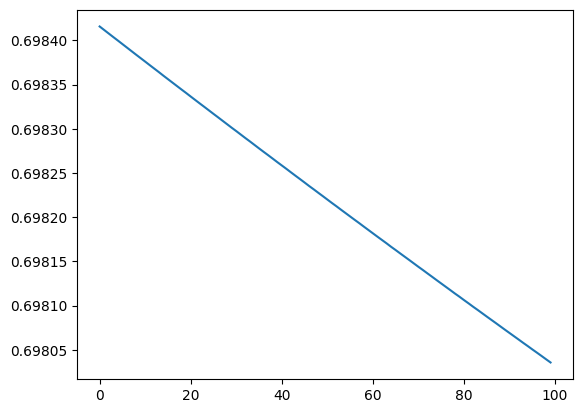

In [7]:
plt.plot(loss_list)
plt.plot()

In [13]:
# modifying input to represent input as [batches, rows, cols]
x = torch.Tensor([0, 0]).unsqueeze(dim = 0)
print(x)

# note
# the weight matrix we get is (out_features, in_features)
# the bias we get is (outfeatures), we need to convert it to (outfeatures, 1)
w1, b1 = model.linear1.weight, model.linear1.bias.reshape(-1, 1)
# print(b1)

l1 = torch.matmul(x, w1.T) + b1
print(l1)

a1 = torch.sigmoid(l1)

w2, b2 = model.linear2.weight, model.linear2.bias.reshape(-1, 1)
l2 = torch.matmul(a1, w2.T) + b2
a2 = torch.sigmoid(l2)
print(a2)

tensor([[0., 0.]])
tensor([[ 0.2954,  0.2954],
        [-0.0766, -0.0766]], grad_fn=<AddBackward0>)
tensor([[0.5454],
        [0.5607]], grad_fn=<SigmoidBackward0>)
